In [1]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#loading the data by combining all sheets in the excel file
loan_recovery = pd.concat(pd.read_excel(r"C:\Users\EliteBook\Desktop\WTCF23\Power BI WTF23\Recovery dataset.xlsx", 
                                        sheet_name = None), ignore_index = True)
pd.set_option("display.max_columns", 31)
loan_recovery.head()

,SystemLoan Id,Region,disburseddate,Unnamed: 3,bankname,loanStatus,loanAmount,interest_due,totaldue,Total Amount Repaid,Total Amount Delinquent,daysinarrears,Bucket,Discount Offered,Discounted Amount,Amount Repaid - Sept Wk 1,Date Repaid,Date Contacted,Connected,Right Party Contact,No. of Times Called,No Of Time Connected,Reason For Deliquency,Promise to Pay,PTP Date,PTP Amount,Call status,Comment,Amount Repaid- Sept Wk 2,Amount Repaid- Sept Wk 3,Amount Repaid- Sept Wk 4
0,304187501343.0,RIVERS,2019-09-04 00:00:00,NaN,Access Bank,ACTIVE_IN_ARREARS,16500.0,6237.0,22737.0,90.00,22647.00,476.0,E,0.10,20382.3000,2000.0,"Sep 3, 2021",2021-09-02,No,NaN,1.0,NaN,NaN,No,NaT,NaN,NO ANSWER,NaN,NaN,NaN,NaN
1,305051387204.0,LAGOS,21/12/2019,NaN,GT Bank,ACTIVE_IN_ARREARS,40500.0,14580.0,55080.0,27770.00,27310.00,337.0,E,0.15,23213.5000,5000.0,"Sep 3, 2021",2021-09-02,Yes,YES,1.0,1.0,financial issues,NO,NaT,NaN,NO ANSWER,NaN,NaN,NaN,NaN
2,305365480980.0,ONDO,2020-01-27 00:00:00,NaN,GT Bank,ACTIVE_IN_ARREARS,14000.0,4200.0,18200.0,20.00,18180.00,331.0,E,0.10,16362.0000,10000.0,"Sep 1, 2021",2021-09-03,No,NaN,1.0,NaN,NaN,NO,NaT,NaN,NO ANSWER,NaN,NaN,NaN,NaN
3,305071549667.0,ONDO,23/12/2019,NaN,UBA,ACTIVE_IN_ARREARS,33000.0,12474.0,45474.0,33441.87,15032.13,335.0,E,0.15,12777.3105,4700.0,"Sep 2, 2021",2021-08-30,Yes,yes,1.0,1.0,Financial Issues,no,NaT,NaN,CONNECTED,NaN,NaN,NaN,NaN
4,303336556440.0,LAGOS,2019-03-23 00:00:00,NaN,GT Bank,ACTIVE_IN_ARREARS,57500.0,17595.0,75095.0,10050.00,25145.00,649.0,E,0.15,21373.2500,500.0,"Aug 31, 2021",2021-09-03,No,NaN,1.0,NaN,NaN,NO,NaT,NaN,NO ANSWER,NaN,NaN,NaN,NaN


In [3]:
#checking the number of rows and columns in the data
loan_recovery.shape

(4144, 31)

In [4]:
loan_recovery.columns = [i.lower() for i in loan_recovery.columns]

In [5]:
#renaming some columns for easy access
loan_recovery.rename(columns = {"systemloan id": "system_id", "total amount repaid" : "total_amount_repaid",
                        "total amount delinquent" : "total_amount_delinquent", "discount offered" : "discount_offered",
                        "discounted amount" : "discounted_amount", "amount repaid - sept wk 1" : "amount_repaid_week1",
                        "date repaid" : "date_repaid", "date_contacted" : "date_contacted", "date contacted" : "date_contacted",
                         "right party contact" : "right_party_contact", "no. of times called" : "no_times_called",
                        "no of time connected" : "no_times_connected", "reason for deliquency" : "reason_delinquency", 
                        "promise to pay" : "promise_to_pay", "ptp date" : "ptp_date", "ptp amount" : "ptp_amount", 
                        "call status" : "call_status", "amount repaid- sept wk 2" : "amount_repaid_week2", 
                        "amount repaid- sept wk 3" : "amount_repaid_week3", "amount repaid- sept wk 4" : "amount_repaid_week4"}, 
                     inplace = True)

In [6]:
#taking a look a the first 10 columns of the data
loan_recovery.head(10)

,system_id,region,disburseddate,unnamed: 3,bankname,loanstatus,loanamount,interest_due,totaldue,total_amount_repaid,total_amount_delinquent,daysinarrears,bucket,discount_offered,discounted_amount,amount_repaid_week1,date_repaid,date_contacted,connected,right_party_contact,no_times_called,no_times_connected,reason_delinquency,promise_to_pay,ptp_date,ptp_amount,call_status,comment,amount_repaid_week2,amount_repaid_week3,amount_repaid_week4
0,304187501343.0,RIVERS,2019-09-04 00:00:00,NaN,Access Bank,ACTIVE_IN_ARREARS,16500.0,6237.00,22737.00,90.00,22647.00,476.0,E,0.10,20382.3000,2000.0,"Sep 3, 2021",2021-09-02,No,NaN,1.0,NaN,NaN,No,NaT,NaN,NO ANSWER,NaN,NaN,NaN,NaN
1,305051387204.0,LAGOS,21/12/2019,NaN,GT Bank,ACTIVE_IN_ARREARS,40500.0,14580.00,55080.00,27770.00,27310.00,337.0,E,0.15,23213.5000,5000.0,"Sep 3, 2021",2021-09-02,Yes,YES,1.0,1.0,financial issues,NO,NaT,NaN,NO ANSWER,NaN,NaN,NaN,NaN
2,305365480980.0,ONDO,2020-01-27 00:00:00,NaN,GT Bank,ACTIVE_IN_ARREARS,14000.0,4200.00,18200.00,20.00,18180.00,331.0,E,0.10,16362.0000,10000.0,"Sep 1, 2021",2021-09-03,No,NaN,1.0,NaN,NaN,NO,NaT,NaN,NO ANSWER,NaN,NaN,NaN,NaN
3,305071549667.0,ONDO,23/12/2019,NaN,UBA,ACTIVE_IN_ARREARS,33000.0,12474.00,45474.00,33441.87,15032.13,335.0,E,0.15,12777.3105,4700.0,"Sep 2, 2021",2021-08-30,Yes,yes,1.0,1.0,Financial Issues,no,NaT,NaN,CONNECTED,NaN,NaN,NaN,NaN
4,303336556440.0,LAGOS,2019-03-23 00:00:00,NaN,GT Bank,ACTIVE_IN_ARREARS,57500.0,17595.00,75095.00,10050.00,25145.00,649.0,E,0.15,21373.2500,500.0,"Aug 31, 2021",2021-09-03,No,NaN,1.0,NaN,NaN,NO,NaT,NaN,NO ANSWER,NaN,NaN,NaN,NaN
5,303633402781.0,LAGOS,2019-06-01 00:00:00,NaN,Access Bank,ACTIVE_IN_ARREARS,43500.0,9787.50,53287.50,14000.00,39287.50,579.0,E,0.15,33394.3750,1000.0,"Aug 31, 2021",2021-09-01,Yes,Yes,1.0,1.0,Financial Issues,Yes,2021-09-04 00:00:00,500.0,CONNECTED,NaN,NaN,NaN,NaN
6,303432790242.0,LAGOS,2019-04-17 00:00:00,NaN,Zenith Bank,ACTIVE_IN_ARREARS,37500.0,14175.00,51675.00,17510.00,34165.00,625.0,E,0.15,29040.2500,5000.0,"Sep 1, 2021",2021-08-31,Yes,yes,1.0,1.0,Financial Issues,no,NaT,NaN,CONNECTED,NaN,NaN,NaN,NaN
7,306518033985.0,ABUJA,2020-07-19 00:00:00,NaN,GT Bank,ACTIVE_IN_ARREARS,93000.0,25495.95,102995.95,44025.96,79569.18,121.0,E,0.15,67633.8030,5000.0,"Sep 2, 2021",2021-08-31,Yes,YES,1.0,1.0,financial issues,YES,2021-09-02 00:00:00,500.0,NO ANSWER,NaN,NaN,NaN,NaN
8,304615351533.0,ABUJA,2019-10-30 00:00:00,NaN,GT Bank,ACTIVE_IN_ARREARS,100500.0,36180.00,136680.00,10380.00,126300.00,415.0,E,0.15,107355.0000,5000.0,"Sep 3, 2021",2021-08-31,Yes,yes,1.0,1.0,Financial Issues,no,NaT,NaN,CONNECTED,NaN,NaN,NaN,NaN
9,305416046721.0,KADUNA,2020-01-02 00:00:00,NaN,Union Bank,ACTIVE_IN_ARREARS,34000.0,12852.00,46852.00,30.00,46822.00,326.0,E,0.10,42139.8000,2000.0,"Sep 3, 2021",2021-09-03,Yes,yes,1.0,1.0,Financial Issues,no,NaT,NaN,CONNECTED,NaN,NaN,NaN,NaN


In [7]:
#A function to get information about the data
def get_info():
    info = pd.DataFrame(index = loan_recovery.columns)
    info["null values"] = loan_recovery.isnull().sum()
    info["duplicates"] = loan_recovery.duplicated().sum()
    info["unique values"] = loan_recovery.nunique()
    info["data types"] = loan_recovery.dtypes
    return info
get_info()

,null values,duplicates,unique values,data types
system_id,0,1,3743,object
region,1,1,37,object
disburseddate,98,1,834,object
unnamed: 3,4144,1,0,float64
bankname,5,1,19,object
loanstatus,376,1,2,object
loanamount,98,1,491,float64
interest_due,98,1,1572,float64
totaldue,0,1,1921,float64
total_amount_repaid,0,1,3218,float64


In [8]:
#taking a peak at the duplicated rows
loan_recovery[loan_recovery.duplicated(keep = False)]

,system_id,region,disburseddate,unnamed: 3,bankname,loanstatus,loanamount,interest_due,totaldue,total_amount_repaid,total_amount_delinquent,daysinarrears,bucket,discount_offered,discounted_amount,amount_repaid_week1,date_repaid,date_contacted,connected,right_party_contact,no_times_called,no_times_connected,reason_delinquency,promise_to_pay,ptp_date,ptp_amount,call_status,comment,amount_repaid_week2,amount_repaid_week3,amount_repaid_week4
2084,305935684072.0,RIVERS,2020-04-06 00:00:00,NaN,GT Bank,ACTIVE_IN_ARREARS,5000.0,630.0,5630.0,62.5,5567.5,255.0,E,0.1,5010.75,NaN,"Sep 16, 2021",2021-09-16,Yes,Yes,1.0,1.0,Financial Issues,YES,2021-09-16 00:00:00,500.0,CONNECTED,NaN,NaN,5567.5,NaN
2111,305935684072.0,RIVERS,2020-04-06 00:00:00,NaN,GT Bank,ACTIVE_IN_ARREARS,5000.0,630.0,5630.0,62.5,5567.5,255.0,E,0.1,5010.75,NaN,"Sep 16, 2021",2021-09-16,Yes,Yes,1.0,1.0,Financial Issues,YES,2021-09-16 00:00:00,500.0,CONNECTED,NaN,NaN,5567.5,NaN


# DATA CLEANING

In [9]:
#removing duplicates
loan_recovery.drop_duplicates(inplace = True)

In [10]:
#confirming duplicates have been dropped by calling the function
get_info()

,null values,duplicates,unique values,data types
system_id,0,0,3743,object
region,1,0,37,object
disburseddate,98,0,834,object
unnamed: 3,4143,0,0,float64
bankname,5,0,19,object
loanstatus,376,0,2,object
loanamount,98,0,491,float64
interest_due,98,0,1572,float64
totaldue,0,0,1921,float64
total_amount_repaid,0,0,3218,float64


In [11]:
#dropping the empty column
loan_recovery.drop(["unnamed: 3"], axis = 1, inplace = True)

In [12]:
#confirming the empty column has been dropped
loan_recovery.head(5)

,system_id,region,disburseddate,bankname,loanstatus,loanamount,interest_due,totaldue,total_amount_repaid,total_amount_delinquent,daysinarrears,bucket,discount_offered,discounted_amount,amount_repaid_week1,date_repaid,date_contacted,connected,right_party_contact,no_times_called,no_times_connected,reason_delinquency,promise_to_pay,ptp_date,ptp_amount,call_status,comment,amount_repaid_week2,amount_repaid_week3,amount_repaid_week4
0,304187501343.0,RIVERS,2019-09-04 00:00:00,Access Bank,ACTIVE_IN_ARREARS,16500.0,6237.0,22737.0,90.00,22647.00,476.0,E,0.10,20382.3000,2000.0,"Sep 3, 2021",2021-09-02,No,NaN,1.0,NaN,NaN,No,NaT,NaN,NO ANSWER,NaN,NaN,NaN,NaN
1,305051387204.0,LAGOS,21/12/2019,GT Bank,ACTIVE_IN_ARREARS,40500.0,14580.0,55080.0,27770.00,27310.00,337.0,E,0.15,23213.5000,5000.0,"Sep 3, 2021",2021-09-02,Yes,YES,1.0,1.0,financial issues,NO,NaT,NaN,NO ANSWER,NaN,NaN,NaN,NaN
2,305365480980.0,ONDO,2020-01-27 00:00:00,GT Bank,ACTIVE_IN_ARREARS,14000.0,4200.0,18200.0,20.00,18180.00,331.0,E,0.10,16362.0000,10000.0,"Sep 1, 2021",2021-09-03,No,NaN,1.0,NaN,NaN,NO,NaT,NaN,NO ANSWER,NaN,NaN,NaN,NaN
3,305071549667.0,ONDO,23/12/2019,UBA,ACTIVE_IN_ARREARS,33000.0,12474.0,45474.0,33441.87,15032.13,335.0,E,0.15,12777.3105,4700.0,"Sep 2, 2021",2021-08-30,Yes,yes,1.0,1.0,Financial Issues,no,NaT,NaN,CONNECTED,NaN,NaN,NaN,NaN
4,303336556440.0,LAGOS,2019-03-23 00:00:00,GT Bank,ACTIVE_IN_ARREARS,57500.0,17595.0,75095.0,10050.00,25145.00,649.0,E,0.15,21373.2500,500.0,"Aug 31, 2021",2021-09-03,No,NaN,1.0,NaN,NaN,NO,NaT,NaN,NO ANSWER,NaN,NaN,NaN,NaN


## Handling NaN

In [13]:
#filling NaN in the categorical variable columns 
loan_recovery[["region", "bankname", "loanstatus", "right_party_contact",
"reason_delinquency", "promise_to_pay", "comment"]] = loan_recovery[["region", "bankname", "loanstatus", 
        "right_party_contact","reason_delinquency", "promise_to_pay", "comment"]].fillna("Unknown")

In [14]:
#filling the NaN in all numeric columns with zero
loan_recovery[["loanamount", "interest_due", "total_amount_delinquent", "discounted_amount", "amount_repaid_week1",
"no_times_connected", "ptp_amount", "amount_repaid_week2", "amount_repaid_week3", "amount_repaid_week4"]] = loan_recovery[["loanamount", "interest_due", "total_amount_delinquent", "discounted_amount", "amount_repaid_week1",
"no_times_connected", "ptp_amount", "amount_repaid_week2", "amount_repaid_week3", "amount_repaid_week4"]].fillna(0)

In [15]:
#replacing NaN in the date columns
#any unknown date will be replaced by 01/01/2000
loan_recovery[["disburseddate", "date_repaid", "ptp_date"]] = loan_recovery[["disburseddate", "date_repaid", 
                                                            "ptp_date"]].fillna("01/01/2000")

In [16]:
#calling the get function to confirm null values are not present in any column
get_info()

,null values,duplicates,unique values,data types
system_id,0,0,3743,object
region,0,0,38,object
disburseddate,0,0,835,object
bankname,0,0,20,object
loanstatus,0,0,3,object
loanamount,0,0,492,float64
interest_due,0,0,1572,float64
totaldue,0,0,1921,float64
total_amount_repaid,0,0,3218,float64
total_amount_delinquent,0,0,3687,float64


In [17]:
#loan_recovery = loan_recovery.applymap(lambda x: x.capitalize() if type(x) == str else x)

## REPLACING INCORRECT VARIABLES IN THE COLUMNS

In [18]:
#calling the unique values in ptp_date
loan_recovery["ptp_date"].unique()

array(['01/01/2000', Timestamp('2021-09-04 00:00:00'),
       Timestamp('2021-09-02 00:00:00'), Timestamp('2021-09-03 00:00:00'),
       Timestamp('2021-09-01 00:00:00'), Timestamp('2021-08-31 00:00:00'),
       Timestamp('2021-09-05 00:00:00'), Timestamp('2021-08-30 00:00:00'),
       datetime.datetime(2021, 9, 7, 0, 0),
       datetime.datetime(2021, 9, 8, 0, 0),
       datetime.datetime(2021, 9, 10, 0, 0),
       datetime.datetime(2021, 9, 12, 0, 0),
       datetime.datetime(2021, 9, 9, 0, 0),
       datetime.datetime(2021, 9, 11, 0, 0), 'No',
       datetime.datetime(2021, 9, 6, 0, 0),
       Timestamp('2021-09-13 00:00:00'), Timestamp('2021-09-15 00:00:00'),
       Timestamp('2021-09-17 00:00:00'), Timestamp('2021-09-16 00:00:00'),
       Timestamp('2021-09-14 00:00:00'), Timestamp('2021-09-18 00:00:00'),
       Timestamp('2021-09-19 00:00:00'), Timestamp('2021-09-22 00:00:00'),
       Timestamp('2021-09-23 00:00:00'), Timestamp('2021-09-24 00:00:00'),
       Timestamp('2021-09-20

In [19]:
#replace No in the ptp_date column with a date variable
loan_recovery["ptp_date"].replace("No", "01/01/2000", inplace = True)

In [20]:
#confirming formatting has been effected 
loan_recovery["loanstatus"].unique()

array(['ACTIVE_IN_ARREARS', 'Unknown', 2349034753347.0], dtype=object)

In [21]:
#replacing 2349034753347.0 in loanstatus with ACTIVE_IN_ARREARS

loan_recovery["loanstatus"].replace(2349034753347.0, "ACTIVE_IN_ARREARS", inplace = True)

#loan_recovery["loanstatus"].iloc[1885] = "ACTIVE_IN_ARREARS"

In [22]:
#calling the unique values in the column
loan_recovery["promise_to_pay"].unique()

array(['No', 'NO', 'no', 'Yes', 'YES', 'yes', 'Unknown', 'no '],
      dtype=object)

In [32]:
#changing all "No " to "No"
loan_recovery["promise_to_pay"].replace("No ", "No", inplace = True)

In [24]:
#changing the case of all string items
loan_recovery = loan_recovery.applymap(lambda x:x.capitalize() if type(x) == str else x)

## Correcting Data Types

In [25]:
#changing the data type for date columns 
loan_recovery["disburseddate"] = pd.to_datetime(loan_recovery["disburseddate"])

loan_recovery["ptp_date"] = pd.to_datetime(loan_recovery["ptp_date"])

loan_recovery["date_repaid"] = pd.to_datetime(loan_recovery["date_repaid"])

In [26]:
loan_recovery["daysinarrears"] = loan_recovery["daysinarrears"].astype(object)

In [27]:
#confirming all columns are in the right data types
get_info()

,null values,duplicates,unique values,data types
system_id,0,0,3743,object
region,0,0,38,object
disburseddate,0,0,730,datetime64[ns]
bankname,0,0,20,object
loanstatus,0,0,2,object
loanamount,0,0,492,float64
interest_due,0,0,1572,float64
totaldue,0,0,1921,float64
total_amount_repaid,0,0,3218,float64
total_amount_delinquent,0,0,3687,float64


In [28]:
#taking a peak at the cleaned data
loan_recovery

,system_id,region,disburseddate,bankname,loanstatus,loanamount,interest_due,totaldue,total_amount_repaid,total_amount_delinquent,daysinarrears,bucket,discount_offered,discounted_amount,amount_repaid_week1,date_repaid,date_contacted,connected,right_party_contact,no_times_called,no_times_connected,reason_delinquency,promise_to_pay,ptp_date,ptp_amount,call_status,comment,amount_repaid_week2,amount_repaid_week3,amount_repaid_week4
0,304187501343.0,Rivers,2019-09-04,Access bank,Active_in_arrears,16500.0,6237.0,22737.00,90.00,22647.00,476.0,E,0.10,20382.3000,2000.0,2021-09-03,2021-09-02,No,Unknown,1.0,0.0,Unknown,No,2000-01-01,0.0,No answer,Unknown,0.0,0.0,0.0
1,305051387204.0,Lagos,2019-12-21,Gt bank,Active_in_arrears,40500.0,14580.0,55080.00,27770.00,27310.00,337.0,E,0.15,23213.5000,5000.0,2021-09-03,2021-09-02,Yes,Yes,1.0,1.0,Financial issues,No,2000-01-01,0.0,No answer,Unknown,0.0,0.0,0.0
2,305365480980.0,Ondo,2020-01-27,Gt bank,Active_in_arrears,14000.0,4200.0,18200.00,20.00,18180.00,331.0,E,0.10,16362.0000,10000.0,2021-09-01,2021-09-03,No,Unknown,1.0,0.0,Unknown,No,2000-01-01,0.0,No answer,Unknown,0.0,0.0,0.0
3,305071549667.0,Ondo,2019-12-23,Uba,Active_in_arrears,33000.0,12474.0,45474.00,33441.87,15032.13,335.0,E,0.15,12777.3105,4700.0,2021-09-02,2021-08-30,Yes,Yes,1.0,1.0,Financial issues,No,2000-01-01,0.0,Connected,Unknown,0.0,0.0,0.0
4,303336556440.0,Lagos,2019-03-23,Gt bank,Active_in_arrears,57500.0,17595.0,75095.00,10050.00,25145.00,649.0,E,0.15,21373.2500,500.0,2021-08-31,2021-09-03,No,Unknown,1.0,0.0,Unknown,No,2000-01-01,0.0,No answer,Unknown,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4139,307663908078.0,Lagos,2021-03-02,Stanbic ibtc,Unknown,60000.0,12000.0,45333.35,25.24,81574.76,123.0,E,0.10,73417.2840,0.0,2021-09-24,2021-09-23,Yes,Yes,1.0,1.0,Financial issues,Yes,2021-09-24,500.0,Connected,Unknown,0.0,0.0,3000.0
4140,307665289795.0,Lagos,2021-03-02,Access bank,Unknown,20000.0,6400.0,26400.00,2.61,26397.39,123.0,E,0.10,23757.6510,0.0,2000-01-01,2021-09-24,Yes,Yes,1.0,1.0,Financial issues,Yes,2021-09-24,100.0,Connected,Unknown,0.0,0.0,0.0
4141,Pp5648634270,Abuja,2020-02-28,Gt bank,Active_in_arrears,59000.0,14160.0,73160.00,53691.43,21468.57,246.0,E,0.15,18248.2845,0.0,2000-01-01,2021-09-20,Yes,Yes,1.0,1.0,Financial issues,Yes,2021-09-21,500.0,Connected,Unknown,0.0,0.0,0.0
4142,Pp5668019010,Lagos,2020-03-02,Gt bank,Active_in_arrears,80500.0,19320.0,99820.00,54806.56,45013.44,237.0,E,0.15,38261.4240,0.0,2000-01-01,2021-09-20,Yes,Yes,1.0,1.0,Financial issues,Yes,2021-09-25,0.0,Connected,No ptp amount,0.0,0.0,0.0


In [29]:
#saving the cleaned data to csv format
loan_recovery.to_csv("loan_recovery_cleaned_data_updated.csv")

# EXPLORATORY DATA ANALYSIS (EDA)

## CONNECTED VS PROMISE TO PAY

In [30]:
#creating a df for the calls connected column
connected_data = loan_recovery["connected"].value_counts().to_frame().reset_index().rename(columns = ({"index" : "connected", 
                                                                                     "connected" : "connected_count"}))
connected_data

,connected,connected_count
0,Yes,2559
1,No,1584


In [33]:
#creating a df for the promise to pay column for analysis
ptp_data = loan_recovery["promise_to_pay"].value_counts().to_frame().reset_index().rename(columns = 
                                                                               {"index" : "promise_to_pay", 
                                                                                "promise_to_pay" : "ptp_count"})
ptp_data

,promise_to_pay,ptp_count
0,No,2124
1,Yes,1989
2,Unknown,30


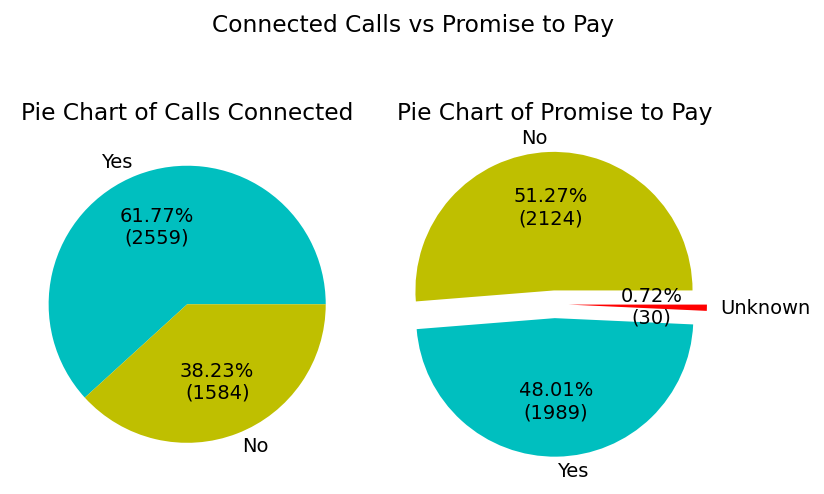

In [34]:
#pie chart for connected calls
df = list(loan_recovery.columns)
for i in df:
    data = loan_recovery[i].value_counts()
    def art(x):
        a = (x/100 * np.sum(data))
        return "{:.2f}%\n({:.0f})".format(x, a)

fig = plt.figure(figsize=(6, 4), dpi = 140)
ax = fig.add_subplot(121)
ax.pie(x = "connected_count", data = connected_data, labels = "connected", autopct = art,
       colors = "cy")
ax.set_title("Pie Chart of Calls Connected")

ax = fig.add_subplot(122)
ax.pie(ptp_data["ptp_count"], labels = ptp_data["promise_to_pay"], data = ptp_data,
       colors = "ycr", autopct = art, explode = (0.1, 0.1, 0.1))
ax.set_title("Pie Chart of Promise to Pay")
fig.suptitle("Connected Calls vs Promise to Pay")

plt.tight_layout()
plt.show()


From the two plots above, it can be observed that 61.77% of the calls made were answered by the debtors and of those who answered, more than half promised they were going to pay the loan back. 2559 persons picked the call and 1989 (48.01%) promised to pay back. It is highly recommended that the company keeps investing in it's call center as it will help remind debtors so that they settle their loans and reduce delinquency in the future.

In [35]:
#creating a column to label each week's payment with zero entries
new = np.zeros(4143)
loan_recovery["week_label"] = new

In [36]:
#labelling each week's repayment by renaming variables in the week_label column 
loan_recovery.loc[loan_recovery["amount_repaid_week1"] > 0, "week_label"] = "week1_repaid"
loan_recovery.loc[loan_recovery["amount_repaid_week2"] > 0, "week_label"] = "week2_repaid"
loan_recovery.loc[loan_recovery["amount_repaid_week3"] > 0, "week_label"] = "week3_repaid"
loan_recovery.loc[loan_recovery["amount_repaid_week4"] > 0, "week_label"] = "week4_repaid"
loan_recovery.loc[loan_recovery["amount_repaid_week3"] < 0, "week_label"] = "extra_loan"

In [37]:
loan_recovery

,system_id,region,disburseddate,bankname,loanstatus,loanamount,interest_due,totaldue,total_amount_repaid,total_amount_delinquent,daysinarrears,bucket,discount_offered,discounted_amount,amount_repaid_week1,date_repaid,date_contacted,connected,right_party_contact,no_times_called,no_times_connected,reason_delinquency,promise_to_pay,ptp_date,ptp_amount,call_status,comment,amount_repaid_week2,amount_repaid_week3,amount_repaid_week4,week_label
0,304187501343.0,Rivers,2019-09-04,Access bank,Active_in_arrears,16500.0,6237.0,22737.00,90.00,22647.00,476.0,E,0.10,20382.3000,2000.0,2021-09-03,2021-09-02,No,Unknown,1.0,0.0,Unknown,No,2000-01-01,0.0,No answer,Unknown,0.0,0.0,0.0,week1_repaid
1,305051387204.0,Lagos,2019-12-21,Gt bank,Active_in_arrears,40500.0,14580.0,55080.00,27770.00,27310.00,337.0,E,0.15,23213.5000,5000.0,2021-09-03,2021-09-02,Yes,Yes,1.0,1.0,Financial issues,No,2000-01-01,0.0,No answer,Unknown,0.0,0.0,0.0,week1_repaid
2,305365480980.0,Ondo,2020-01-27,Gt bank,Active_in_arrears,14000.0,4200.0,18200.00,20.00,18180.00,331.0,E,0.10,16362.0000,10000.0,2021-09-01,2021-09-03,No,Unknown,1.0,0.0,Unknown,No,2000-01-01,0.0,No answer,Unknown,0.0,0.0,0.0,week1_repaid
3,305071549667.0,Ondo,2019-12-23,Uba,Active_in_arrears,33000.0,12474.0,45474.00,33441.87,15032.13,335.0,E,0.15,12777.3105,4700.0,2021-09-02,2021-08-30,Yes,Yes,1.0,1.0,Financial issues,No,2000-01-01,0.0,Connected,Unknown,0.0,0.0,0.0,week1_repaid
4,303336556440.0,Lagos,2019-03-23,Gt bank,Active_in_arrears,57500.0,17595.0,75095.00,10050.00,25145.00,649.0,E,0.15,21373.2500,500.0,2021-08-31,2021-09-03,No,Unknown,1.0,0.0,Unknown,No,2000-01-01,0.0,No answer,Unknown,0.0,0.0,0.0,week1_repaid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4139,307663908078.0,Lagos,2021-03-02,Stanbic ibtc,Unknown,60000.0,12000.0,45333.35,25.24,81574.76,123.0,E,0.10,73417.2840,0.0,2021-09-24,2021-09-23,Yes,Yes,1.0,1.0,Financial issues,Yes,2021-09-24,500.0,Connected,Unknown,0.0,0.0,3000.0,week4_repaid
4140,307665289795.0,Lagos,2021-03-02,Access bank,Unknown,20000.0,6400.0,26400.00,2.61,26397.39,123.0,E,0.10,23757.6510,0.0,2000-01-01,2021-09-24,Yes,Yes,1.0,1.0,Financial issues,Yes,2021-09-24,100.0,Connected,Unknown,0.0,0.0,0.0,0.0
4141,Pp5648634270,Abuja,2020-02-28,Gt bank,Active_in_arrears,59000.0,14160.0,73160.00,53691.43,21468.57,246.0,E,0.15,18248.2845,0.0,2000-01-01,2021-09-20,Yes,Yes,1.0,1.0,Financial issues,Yes,2021-09-21,500.0,Connected,Unknown,0.0,0.0,0.0,0.0
4142,Pp5668019010,Lagos,2020-03-02,Gt bank,Active_in_arrears,80500.0,19320.0,99820.00,54806.56,45013.44,237.0,E,0.15,38261.4240,0.0,2000-01-01,2021-09-20,Yes,Yes,1.0,1.0,Financial issues,Yes,2021-09-25,0.0,Connected,No ptp amount,0.0,0.0,0.0,0.0


## PIVOT TABLE OF THE TOTAL AMOUNT REPAID IN THE FOUR WEEKS AVAILABLE

In [38]:
#creating a pivot table for total amount repaid in each week
sum_per_week = loan_recovery.pivot_table(index = ["week_label"], values = ["amount_repaid_week1", "amount_repaid_week2",
                                                                                "amount_repaid_week3", "amount_repaid_week4"],
                                         aggfunc = "sum")
sum_per_week

,amount_repaid_week1,amount_repaid_week2,amount_repaid_week3,amount_repaid_week4
week_label,,,,
0.0,0.00,0.00,0.0,0.00
extra_loan,0.00,0.00,-5000.0,0.00
week1_repaid,2959878.92,0.00,0.0,0.00
week2_repaid,0.00,14769091.02,0.0,0.00
week3_repaid,0.00,0.00,2433323.9,0.00
week4_repaid,0.00,0.00,0.0,2580828.13


In [39]:
#dropping the first two rows 
#Note: -5000 means the client took an additional loan of 5000
sum_per_week.drop([0, "extra_loan"], inplace = True)

In [40]:
#joining the amounts repaid for all four weeks in one column
sum_per_week["weeks_joined"] = sum_per_week["amount_repaid_week1"] + sum_per_week["amount_repaid_week2"] + sum_per_week["amount_repaid_week3"] + sum_per_week["amount_repaid_week4"]

In [41]:
#viewing 
sum_per_week

,amount_repaid_week1,amount_repaid_week2,amount_repaid_week3,amount_repaid_week4,weeks_joined
week_label,,,,,
week1_repaid,2959878.92,0.00,0.0,0.00,2959878.92
week2_repaid,0.00,14769091.02,0.0,0.00,14769091.02
week3_repaid,0.00,0.00,2433323.9,0.00,2433323.90
week4_repaid,0.00,0.00,0.0,2580828.13,2580828.13


In [42]:
#calculating the percentage growth rate of payment by the four weeks
sum_per_week["growth_rate"] = sum_per_week["weeks_joined"].pct_change()*100
sum_per_week

,amount_repaid_week1,amount_repaid_week2,amount_repaid_week3,amount_repaid_week4,weeks_joined,growth_rate
week_label,,,,,,
week1_repaid,2959878.92,0.00,0.0,0.00,2959878.92,NaN
week2_repaid,0.00,14769091.02,0.0,0.00,14769091.02,398.976189
week3_repaid,0.00,0.00,2433323.9,0.00,2433323.90,-83.524214
week4_repaid,0.00,0.00,0.0,2580828.13,2580828.13,6.061841


## CONNECTED CALLS VS LOAN REPAYMENT

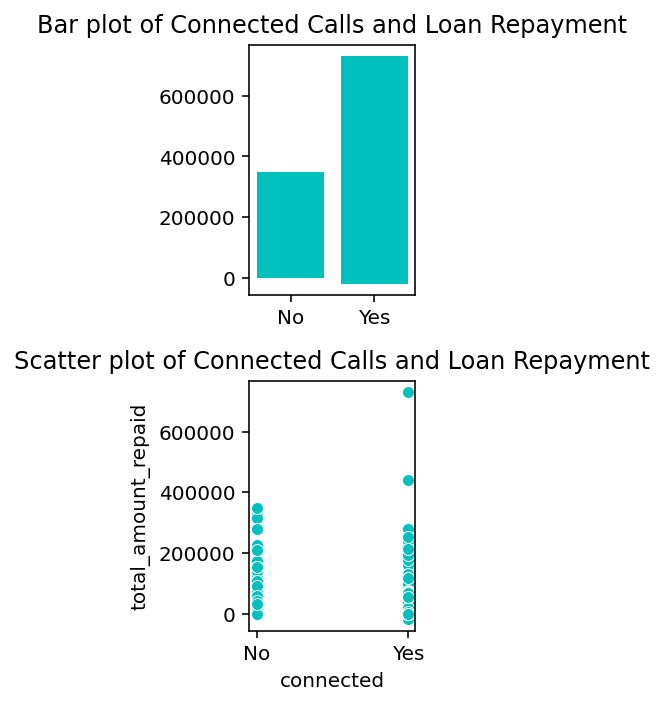

In [43]:
#finding a relationship between connected calls and repayment
fig = plt.figure(figsize = (5, 5), dpi = 144)
ax = fig.add_subplot(231)
ax.bar(loan_recovery["connected"], loan_recovery["total_amount_repaid"], color = "c")
ax.set_title("Bar plot of Connected Calls and Loan Repayment")

ax = fig.add_subplot(234)
ax.set_title("Scatter plot of Connected Calls and Loan Repayment")
sns.scatterplot(data = loan_recovery, y = "total_amount_repaid", x = "connected", color = "c" )
plt.tight_layout()
plt.show()

From the graph above, it can be observed that, calls to the debtors resulted in an increase in loan repayment. Therefore it will be idea for the company to improve its calls to clients to be able to recover more loans given out. Though the graphs show some repayment from clients who were not called or who could not be reached on phone but repayments from such clients was low as compared to the former.

In [44]:
#loan_recovery["all_weeks"] = loan_recovery["amount_repaid_week1"] + loan_recovery["amount_repaid_week2"] + loan_recovery["amount_repaid_week3"] + loan_recovery["amount_repaid_week4"]

## LOAN REPAYMENT VS BUCKETS IN THE FOUR WEEKS

In [45]:
bucket_weeks = loan_recovery.pivot_table(index = ["bucket"], values = ["amount_repaid_week1", "amount_repaid_week2", "amount_repaid_week3", 
                                                        "amount_repaid_week4"], aggfunc = "sum")
bucket_weeks

,amount_repaid_week1,amount_repaid_week2,amount_repaid_week3,amount_repaid_week4
bucket,,,,
D,356686.07,1973798.36,250106.97,143908.39
E,2603192.85,12795292.66,2178216.93,2436919.74


In [46]:
bucket_total_repayment = loan_recovery.pivot_table(index = ["bucket"], values = ["total_amount_repaid"], aggfunc = "sum")
bucket_total_repayment

,total_amount_repaid
bucket,
D,1.577326e+07
E,8.989923e+07


In [47]:

connected_calls_bucket = loan_recovery.pivot_table(index = ["bucket"], values = ["total_amount_repaid"], columns = "connected", 
                                                   aggfunc = "count")
connected_calls_bucket

total_amount_repaid      
connected                  No   Yes
bucket                             
D                         401   454
E                        1183  2105

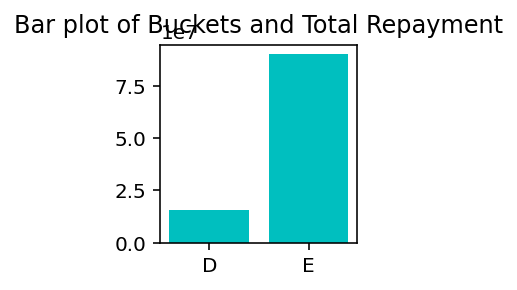

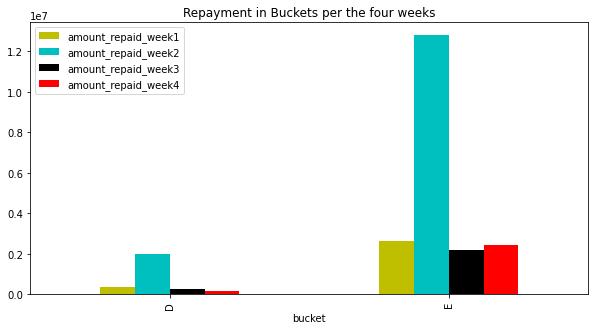

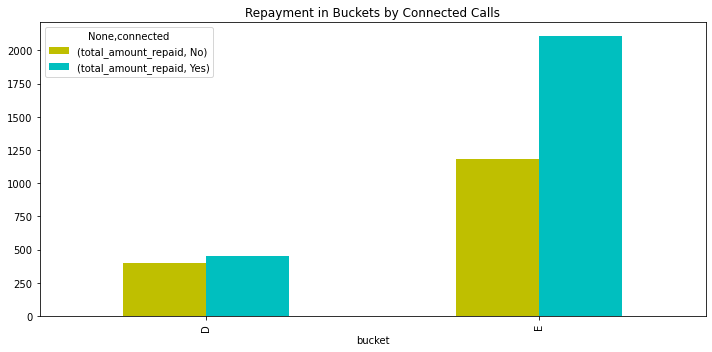

In [48]:
#repayment pattern between buckets
fig = plt.figure(figsize = (6, 4), dpi = 144)
ax = fig.add_subplot(231)
plt.bar(bucket_total_repayment.index, bucket_total_repayment.total_amount_repaid, color = ("c"))
plt.title("Bar plot of Buckets and Total Repayment")

#ax = fig.add_subplot(234)
bucket_weeks.plot(kind = "bar", figsize = (10, 5), color = ("yckr"))
plt.title("Repayment in Buckets per the four weeks")

#ax = fig.add_subplot(233)
connected_calls_bucket.plot(kind = "bar", figsize = (10, 5), color = ("yc"))
plt.title("Repayment in Buckets by Connected Calls")
plt.tight_layout()
plt.show()

From the graph above, clients found in bucket E repaid more of their loans to the company than those in bucket D. The company recovered more loans from clients in bucket E through calls connected than in bucket D. It is possible most of the clients in bucket D are low income earners with no access to phones. The margin between connected calls resulting in payment in bucket E is far greater than that of bucket D. Also since the company recovered most of its loans in week 2, it's possible its clients are salaried workers with bucket E being high income earners and bucket D being low income earners.

In [49]:
#average repayment in buckets
avg_repayment_bucket = loan_recovery.pivot_table(index = ["bucket"], values = ["total_amount_repaid"], aggfunc = "mean")
avg_repayment_bucket.rename(columns = {"total_amount_repaid" : "average_repayment"}, inplace = True)
avg_repayment_bucket

,average_repayment
bucket,
D,18448.254386
E,27341.615750


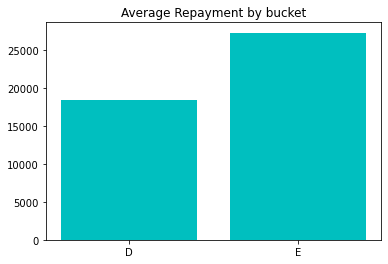

In [50]:
#graph of average repayment in buckets
plt.bar(avg_repayment_bucket.index, avg_repayment_bucket.average_repayment, color = "c")
plt.title("Average Repayment by bucket")
plt.show()

In [51]:
#regions with their repayment rates
region_repayment = loan_recovery.groupby("region")["total_amount_repaid"].sum().sort_values(ascending = False).to_frame()
sum_region = region_repayment["total_amount_repaid"].sum()
region_repayment["region_repayment_rate"] = region_repayment.applymap(lambda x:(x/sum_region*100).round(2))
region_repayment

,total_amount_repaid,region_repayment_rate
region,,
Lagos,4.900919e+07,46.38
Ogun,1.071115e+07,10.14
Abuja,6.919631e+06,6.55
Oyo,6.848859e+06,6.48
Rivers,6.271640e+06,5.93
Delta,4.324276e+06,4.09
Edo,2.451742e+06,2.32
Ondo,2.000140e+06,1.89
Akwa ibom,1.858482e+06,1.76


From the above output for region_repayment, Lagos had the highest repayment rate (46.38%). This implies most of the clients found in Lagos tend to repay their loans as compared to those found in Zamfara.

In [52]:
bank_repayment = loan_recovery.groupby("bankname")["total_amount_repaid"].sum().sort_values(ascending = False).to_frame()
sum_bank_repayment = bank_repayment["total_amount_repaid"].sum()
bank_repayment["bank_repayment_rate"] = bank_repayment.applymap(lambda x: ((x/sum_bank_repayment)*100).round(2))
bank_repayment

,total_amount_repaid,bank_repayment_rate
bankname,,
Gt bank,3.603089e+07,34.10
First bank,1.623656e+07,15.36
Access bank,1.020127e+07,9.65
Uba,9.096246e+06,8.61
Zenith bank,8.667906e+06,8.20
Diamond bank,7.125490e+06,6.74
Fcmb,3.650821e+06,3.45
Ecobank,3.438473e+06,3.25
Stanbic ibtc,2.939481e+06,2.78


From the bank_repayment dataframe above, it can be observed that GT Bank has the highest repayment rate 34.1% as compared to SunTrust Bank which had the lowest repayment rate of 0.01%. This implies that GT Bank is able to recover more of its loans given out as compared to the other banks. Also it is possible its employees go the extra mile to secure loan repayment from clients. 

In [53]:
loans_delinquent = loan_recovery.groupby("bankname")["total_amount_repaid", 
                                                     "total_amount_delinquent"].sum().sort_values(by = ["total_amount_repaid", 
                                                                                                        "total_amount_delinquent"], 
                                                                                                  ascending = False)
loans_delinquent

,total_amount_repaid,total_amount_delinquent
bankname,,
Gt bank,3.603089e+07,5.845969e+07
First bank,1.623656e+07,2.704842e+07
Access bank,1.020127e+07,1.800544e+07
Uba,9.096246e+06,1.742743e+07
Zenith bank,8.667906e+06,1.760746e+07
Diamond bank,7.125490e+06,1.091445e+07
Fcmb,3.650821e+06,7.112062e+06
Ecobank,3.438473e+06,4.716552e+06
Stanbic ibtc,2.939481e+06,5.769625e+06


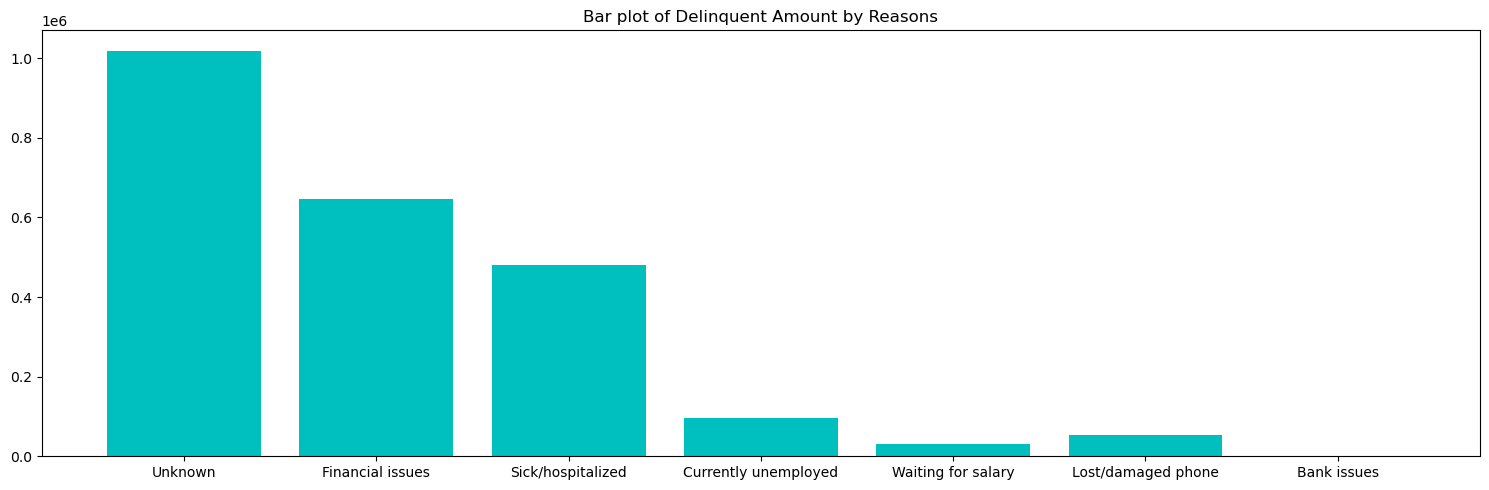

In [54]:
plt.figure(figsize = (15, 5), dpi = 100)
#ax = fig.add_subplot(231)
plt.bar(loan_recovery["reason_delinquency"], loan_recovery["total_amount_delinquent"], color = ("c"))
plt.title("Bar plot of Delinquent Amount by Reasons")
plt.tight_layout()
plt.show()

## Recommendation
The banks should continue to invest in its call centers as it helps in recoverying more loans given out

The banks should do an extensive check on clients backgrounds before giving out loans to avoid delinquency

The company can send reminders to customers about amount due in the first week of every new month and actively pursue them for repayment in week 2 and 3 as these weeks showed a massive repayment growth rate.

More loans can be given to customers in Lagos as they're likely to repay more than the other regions.


The company can adopt the method of group loans to natives of Zamfara as they had the lowest repayment rate.


The company can encourage group savings to be used as collateral for loan. Members of such groups will encourage the others to pay as failure on one part means failure for all.

Loans given out should be proportional to proven stable inflows of the clients and not just by word of mouth about income.


The company should focus more in giving out loans to clients categorized under bucket E as they repay more of their loans than those in bucket D. This will also increase the company's inflows through interest on repayment.


Since a greater portion of the amount repaid in bucket E are in week 1 and week 2, it can be assumed that most of these people are stable income earners. Eg. salaried workers, CEOs etc.

